In [16]:
#!/usr/bin/env python
# coding: utf-8
# -*- coding: utf-8 -*-

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

warnings.filterwarnings('ignore')

def janelamento(data, janela):
  dataset = []
  tamanho_x = data.shape[0] - 1

  t=0
  while(t<tamanho_x - 3):
    y = 0
    row = []
    while(y < janela):
      if(y+t < tamanho_x):
        row.append(data.iloc[y+t][4])
      else:
        break
      y = y + 1

    dataset.append(row)

    t = t + 1


  dataset = np.array(dataset)
  #dataset = dataset.astype(np.float)

  return pd.DataFrame(dataset)


def treinamento(df, entrada, epocas):
  X, y = df.iloc[:, 0:entrada], df.iloc[:, entrada]

  scaler = MinMaxScaler(feature_range=(0, 1))
  x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=0, shuffle=False)


  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=False)

  model = Sequential()

  model.add(Dense(12, input_shape=(entrada,), activation='relu'))
  model.add(Dense(8, activation="relu"))
  model.add(Dense(1, activation='linear'))
  model.compile(loss='mse', optimizer='adam', metrics=['mean_absolute_error', 'mse'])

  batch_size = 2
  epochs = epocas

  history = model.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_val, y_val))

 # Plotando o historico do processo de treinamento
  plt.figure(figsize=(20, 5))
  plt.plot(history.history['loss'], color='blue')
  plt.plot(history.history['val_loss'], color='red')
  plt.title('Model loss', fontsize=20)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['Treinamento', 'Validação'], loc='upper right', fontsize=14)
  plt.show()

  y_pred = model.predict(x_test)

  mse = history.history['loss'][-1]
  mae = history.history['mean_absolute_error'][-1]
  r2 = r2_score(y_test, y_pred)

  aux1=[]
  for a in y_test:
    aux1.append(float(a))

  aux2=[]
  for a in y_pred:
    aux2.append(float(a))

  r, p_value = pearsonr(aux1, aux2)

  print('R²: ',r2)
  print('Erro medio absoluto: ', mae)
  print('Erro medio quadratico: ', mse)
  print('r: ', r)

  return y_test, y_pred, model, scaler


import csv

from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
       print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))
       name = fn

data = pd.read_csv(name,sep=',' )
display(data)

tamanho_x = data.shape[0] - 1
qtde_itens_x = data.shape[1]

datasetJanela = janelamento(data, 4)



Saving anemo-mucuri-150m-dez2015.csv to anemo-mucuri-150m-dez2015 (6).csv
User uploaded file "anemo-mucuri-150m-dez2015 (6).csv" with length 67529 bytes


,dia,mes,ano,hora,v_anemo2,dir_1,temp,umid,pressao
0,30,11,2015,14,13.012139,75.105481,27.516129,72.930636,1020.422601
1,30,11,2015,15,12.726087,68.334332,27.238095,75.212121,1020.394348
2,30,11,2015,16,12.081111,64.457865,27.105263,75.741379,1020.508333
3,30,11,2015,17,11.647222,53.842100,26.305556,75.302632,1020.611000
4,30,11,2015,18,11.064444,53.945279,25.464286,76.592593,1020.866500
...,...,...,...,...,...,...,...,...,...
940,8,1,2016,18,9.912222,52.821150,26.307692,76.327434,1020.233333
941,8,1,2016,19,9.779444,52.858224,25.601942,75.980645,1020.723500
942,8,1,2016,20,9.635556,50.408659,25.500000,79.973684,1021.078667
943,8,1,2016,21,8.978889,49.365114,25.225806,86.210884,1021.489000


In [17]:
print("Dataset Janela")
display(datasetJanela)

Dataset Janela


,0,1,2,3
0,13.012139,12.726087,12.081111,11.647222
1,12.726087,12.081111,11.647222,11.064444
2,12.081111,11.647222,11.064444,10.324444
3,11.647222,11.064444,10.324444,9.862778
4,11.064444,10.324444,9.862778,9.598889
...,...,...,...,...
936,12.710556,8.843889,10.607778,10.408889
937,8.843889,10.607778,10.408889,9.912222
938,10.607778,10.408889,9.912222,9.779444
939,10.408889,9.912222,9.779444,9.635556


Epoch 1/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 56.0317 - mean_absolute_error: 6.8667 - mse: 56.0317 - val_loss: 3.5984 - val_mean_absolute_error: 1.4589 - val_mse: 3.5984
Epoch 2/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.0174 - mean_absolute_error: 1.3401 - mse: 3.0174 - val_loss: 3.1896 - val_mean_absolute_error: 1.3696 - val_mse: 3.1896
Epoch 3/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7923 - mean_absolute_error: 1.2994 - mse: 2.7923 - val_loss: 3.0583 - val_mean_absolute_error: 1.3419 - val_mse: 3.0583
Epoch 4/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6830 - mean_absolute_error: 1.2989 - mse: 2.6830 - val_loss: 2.9398 - val_mean_absolute_error: 1.3163 - val_mse: 2.9398
Epoch 5/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5913 - mean_absolute_error: 1.2434 - mse: 2.5913 - val_loss: 2.8100 - val_mean_absolute_error: 1.3098 - val_mse: 2.8100
Epoch 6/200
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5944 - mean_absolute

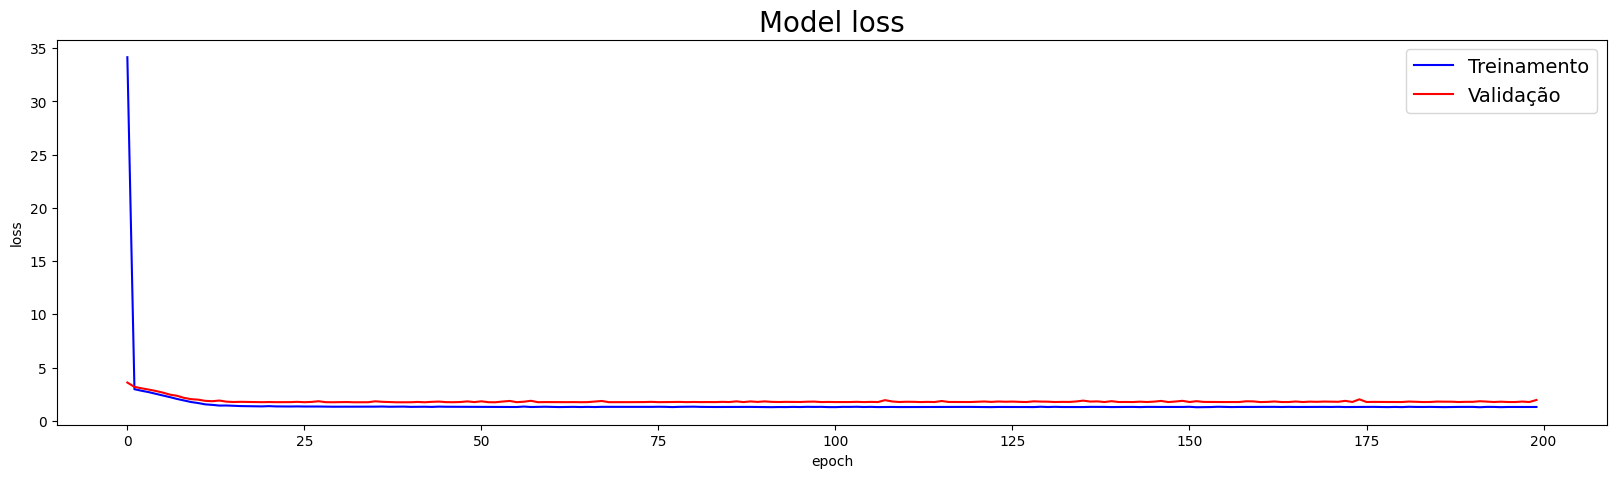

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
R²:  0.7979633466420666
Erro medio absoluto:  0.8372811675071716
Erro medio quadratico:  1.302318811416626
r:  0.913078376696202


In [18]:

y_testJ, y_predJ, modelJ, scalerJ = treinamento(datasetJanela, 3, 200)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Janelamento: Predicted=[301.67322]


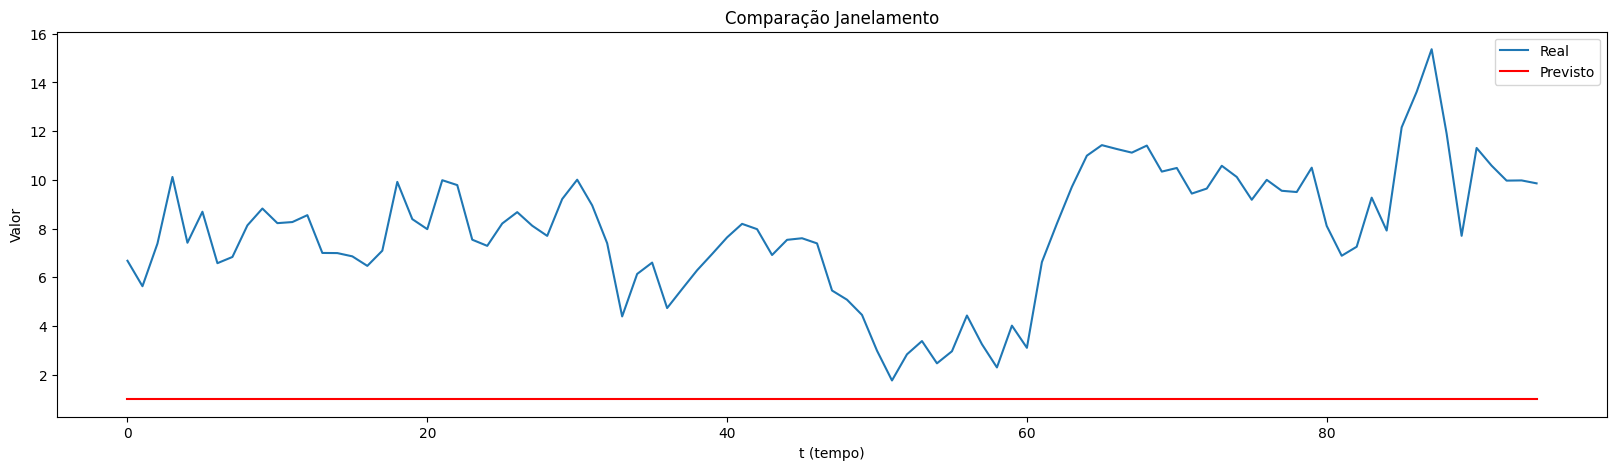

In [19]:

# new instance where we do not know the answer

XnewJ = np.array([[336.63, 337.74, 338.36]])

# make a prediction
ynewJ = modelJ.predict(scalerJ.transform(XnewJ))

print("Janelamento: Predicted=%s" % (ynewJ[0]))

plt.figure(figsize=(20, 5))
plt.plot(y_predJ, label="Real")
plt.plot(auxJ, color='red', label = 'Previsto')
plt.title('Comparação Janelamento')
plt.legend()
plt.xlabel("t (tempo)")
plt.ylabel('Valor')
plt.show()